### Data Mining

#### Bootstrapping

In [1]:
# Load the dataset
data(co2)

# View the first few rows of the dataset
head(co2)

[1] 315.42 316.31 316.50 317.56 318.13 318.00

In [3]:
library(ggplot2)
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
boot.med=vector(length=10000)
for (i in 1:length(boot.med)){boot.samp=sample(co2,replace=T) 
boot.med[i]=median(boot.samp)
}
sd(boot.med)
act.med
quantile(boot.med,probs = c(0.025,0.975))
ggplot(data=data.frame(boot.med),aes(x=boot.med))+geom_histogram() + labs(x="Bootstrap Sample",y="Frequency")


[1] 1.362868

ERROR: Error in eval(expr, envir, enclos): object 'act.med' not found


#### Adjusting P-values
- do this when doing a lot of hypothesis testing, controls for higher propensity of family wise error rates
- example is Bonferroni correction
- n hypothesis tests, multiply each p-value by number of hypothesis tests (n)
- truncate at 1
- additional example is the False Discovery Rate: doesnt control family wise error rate, but controls for False Discoveries (genome)

In [6]:
temp=c(0.001,0.03,0.2,0.4)
#Bonferoni
p.adjust(temp,method="bonferroni")
#Benjamini & Hochberg
p.adjust(temp,method="BH")

[1] 0.004 0.120 0.800 1.000

[1] 0.0040000 0.0600000 0.2666667 0.4000000

#### Transaction Data
- goal is to have one row per observation
- use group by's
- create features

#### Missing Data
- flag
- impute: in R, MICE and Random Forest
- always check data: does the imputation make sense contextually

### Association Analysis

In [11]:
temp.dat = read.csv("https://raw.githubusercontent.com/sjsimmo2/DataMining-Fall/refs/heads/master/Grocery1.csv")

In [12]:
head(temp.dat)

,ID,Grocery
,<int>,<chr>
1,1,bread
2,1,egg
3,1,papaya
4,1,oat packet
5,2,papaya
6,2,bread


In [14]:
install.packages("arules")  # Install if needed
library(arules)


The downloaded binary packages are in
	/var/folders/2g/7wbchb2s0wvgd6gwy4w7vlch0000gn/T//RtmpFwObMj/downloaded_packages


Warning message:
"package 'arules' was built under R version 4.4.1"
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'arules'


The following object is masked from 'package:dplyr':

    recode


The following objects are masked from 'package:base':

    abbreviate, write




In [15]:
library(arules)

# Assuming temp.dat$ID is the customer ID and temp.dat$Grocery is the purchased items
# Split data by customer ID (list of items per customer)
trans_list <- split(temp.dat$Grocery, temp.dat$ID)

# Convert to a transactions object using arules' as() method
trans.dat <- as(trans_list, "transactions")

# Inspect the transaction data
inspect(trans.dat)


     items                             transactionID
[1]  {bread, egg, oat packet, papaya}  1            
[2]  {bread, milk, oat packet, papaya} 2            
[3]  {bread, butter, egg}              3            
[4]  {egg, milk, oat packet}           4            
[5]  {bread, butter, milk}             5            
[6]  {milk, papaya}                    6            
[7]  {bread, butter, papaya}           7            
[8]  {bread, egg}                      8            
[9]  {oat packet, papaya}              9            
[10] {bread, milk, papaya}             10           
[11] {egg, milk}                       11           


In [16]:
trans.dat@itemInfo$labels

[1] "bread"      "butter"     "egg"        "milk"       "oat packet"
[6] "papaya"

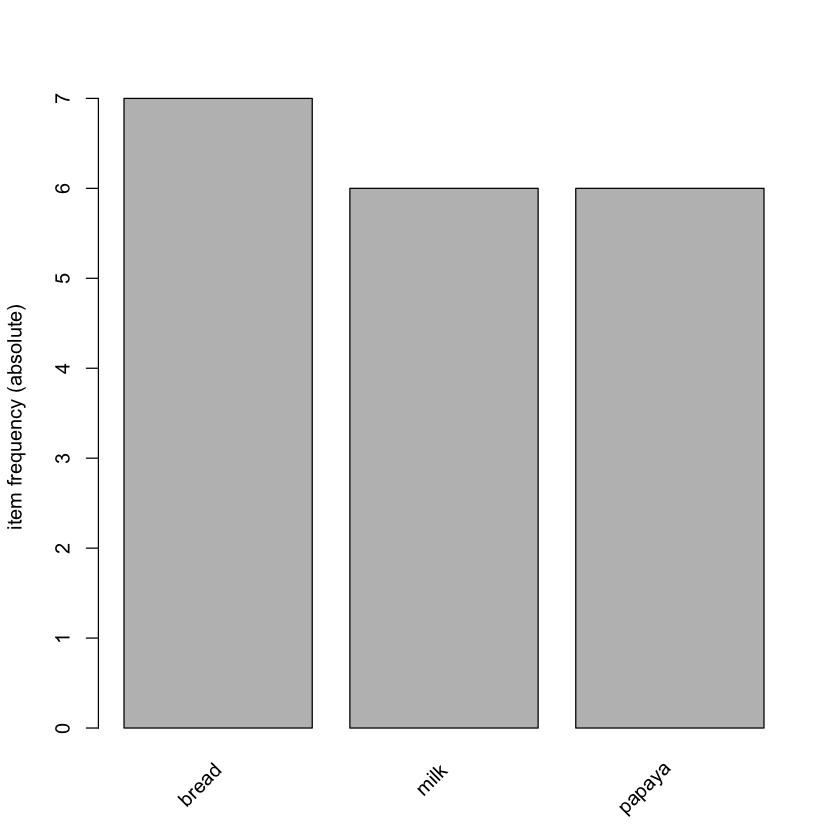

In [17]:
itemFrequencyPlot(trans.dat,topN=3,type="absolute")


In [18]:
rules <- apriori(trans.dat, parameter = list(supp = 0.1, conf = 0.001, target="rules"))
rules<-sort(rules, by="confidence", decreasing=TRUE)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
      0.001    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 11 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [32 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [19]:
inspect(rules[1:4])

    lhs                    rhs      support   confidence coverage  lift    
[1] {butter}            => {bread}  0.2727273 1.0000000  0.2727273 1.571429
[2] {bread, oat packet} => {papaya} 0.1818182 1.0000000  0.1818182 1.833333
[3] {oat packet}        => {papaya} 0.2727273 0.7500000  0.3636364 1.375000
[4] {papaya}            => {bread}  0.3636364 0.6666667  0.5454545 1.047619
    count
[1] 3    
[2] 2    
[3] 3    
[4] 4    


In [21]:
oat.rules = apriori(trans.dat, parameter = list(supp=0.001, conf=0.8),appearance = 
list(default="lhs",rhs="oat packet"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[6 item(s), 11 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [22]:

inspect(oat.rules)

    lhs                     rhs          support    confidence coverage   lift
[1] {egg, papaya}        => {oat packet} 0.09090909 1          0.09090909 2.75
[2] {bread, egg, papaya} => {oat packet} 0.09090909 1          0.09090909 2.75
    count
[1] 1    
[2] 1    


In [31]:
install.packages('arulesViz')
install.packages('htmlwidgets')


The downloaded binary packages are in
	/var/folders/2g/7wbchb2s0wvgd6gwy4w7vlch0000gn/T//RtmpFwObMj/downloaded_packages

The downloaded binary packages are in
	/var/folders/2g/7wbchb2s0wvgd6gwy4w7vlch0000gn/T//RtmpFwObMj/downloaded_packages


In [32]:
library(arulesViz)
library(htmlwidgets)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



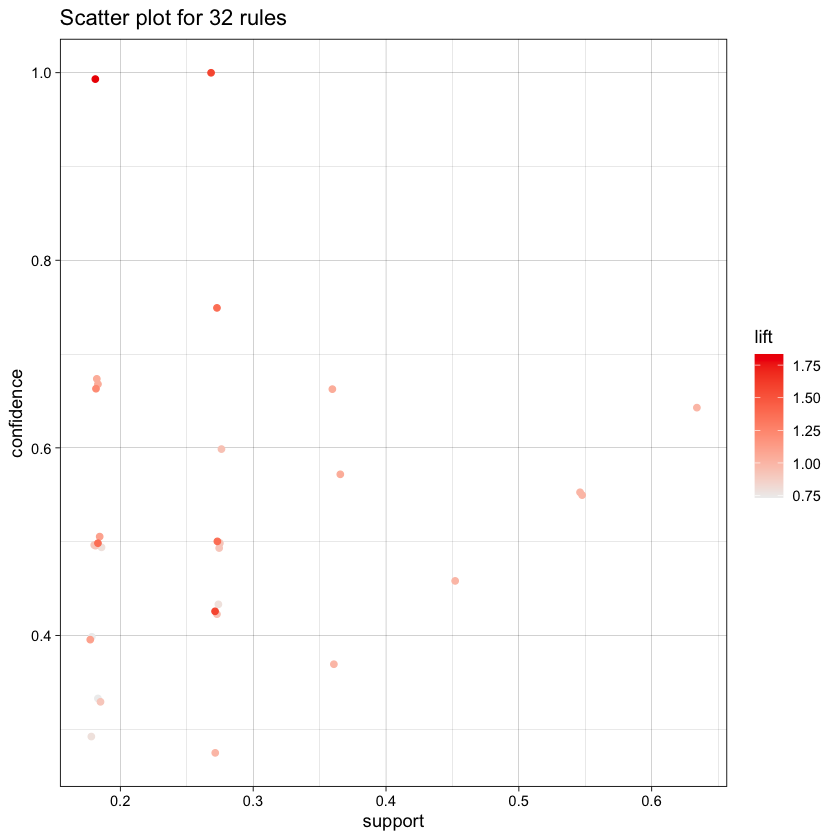

In [33]:
plot(rules)

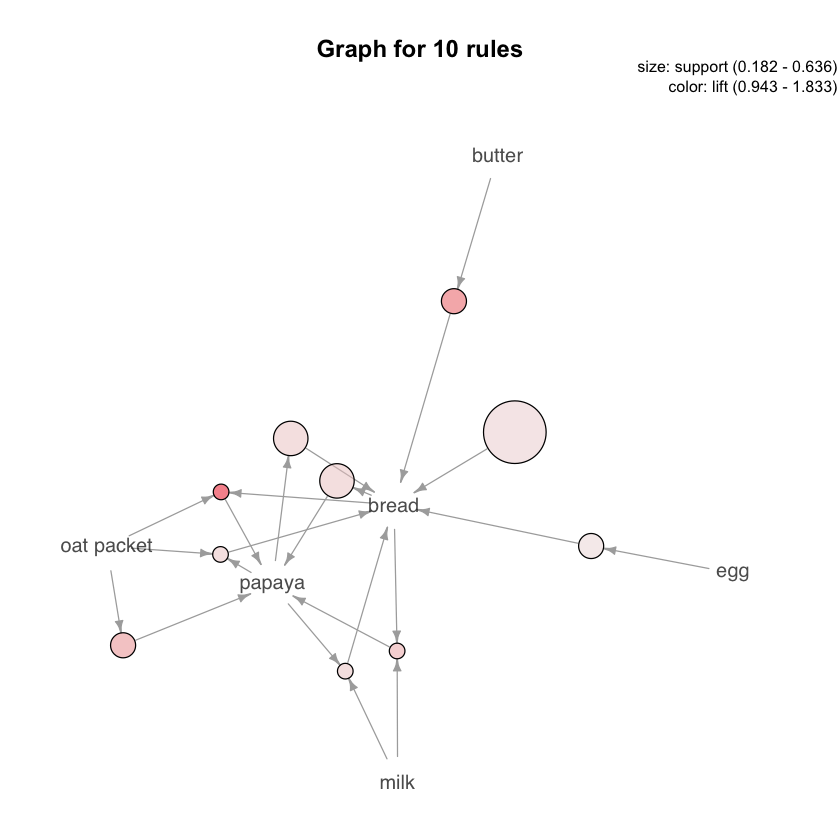

In [35]:
top10rules = head(rules, n = 10, by = "confidence")
plot(top10rules, method = "graph", engine = "igraph")

## Classification and Regression Trees (CART)